### Ce notebook permet de faire de la reconaissnace de chiffre écrit à la main en utilisant un réseau de neurones convolutif. 


import : 

In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Chargement des données MNIST

In [61]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalisation des données pour faciliter l'apprentissage du réseau : 

In [62]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Création d'un modèle simple de réseau de neurones multicouches

In [63]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

Compilation du modèle

In [64]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Petit check du model

In [65]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Entraînement du modèle

In [66]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8493 - loss: 0.5006 - val_accuracy: 0.9668 - val_loss: 0.1256
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9546 - loss: 0.1546 - val_accuracy: 0.9718 - val_loss: 0.0953
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9660 - loss: 0.1129 - val_accuracy: 0.9757 - val_loss: 0.0802
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9713 - loss: 0.0947 - val_accuracy: 0.9747 - val_loss: 0.0809
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9759 - loss: 0.0790 - val_accuracy: 0.9788 - val_loss: 0.0700


Évaluation du modèle

In [67]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.9745 - loss: 0.0871
Test accuracy: 0.9782000184059143


Afficher les performances du modèle

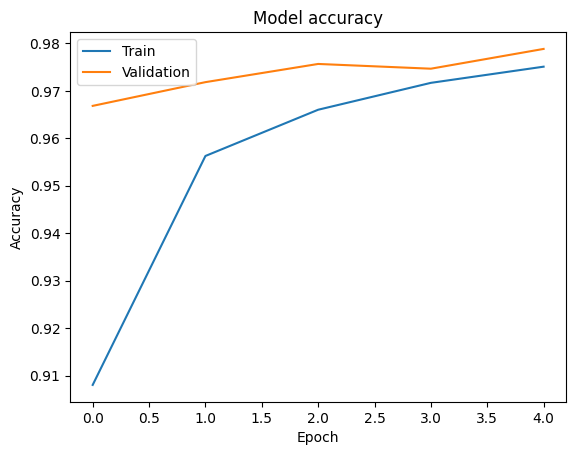

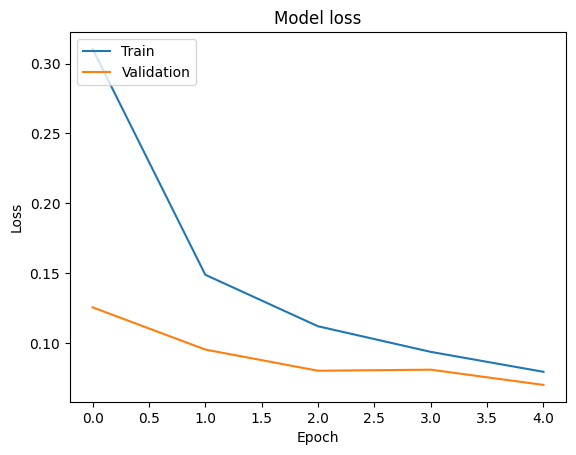

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Évaluer le modèle

In [69]:
scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.9745 - loss: 0.0871
Accuracy: 97.82%


Prédiction et visualisation des résultats

In [70]:
predictions = model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


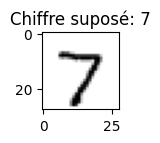

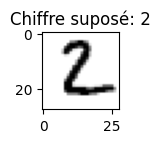

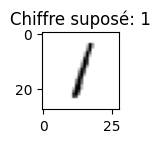

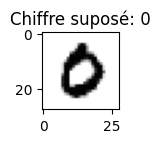

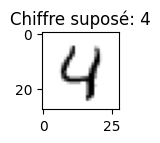

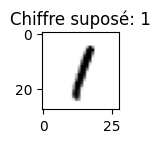

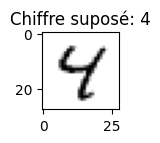

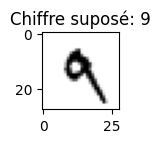

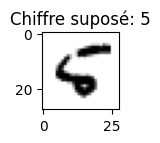

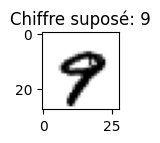

In [71]:
for i, prediction in enumerate(predictions):
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Chiffre suposé: {prediction.argmax()}")
    plt.show()

test du code avec des images faites à la main

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


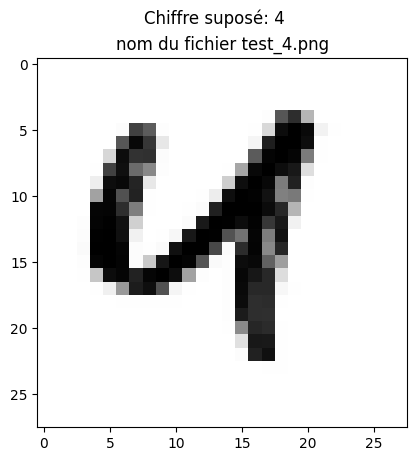

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


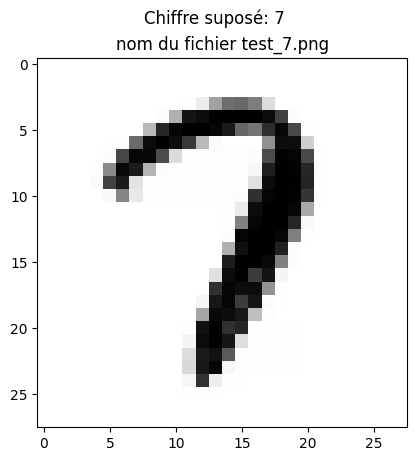

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


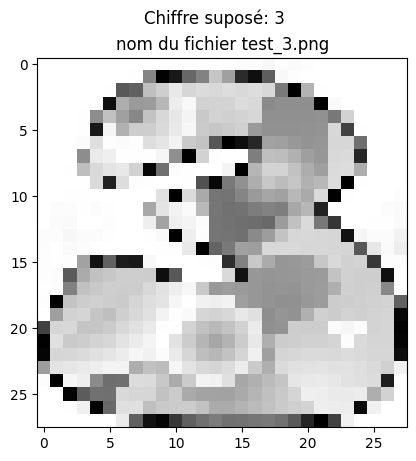

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


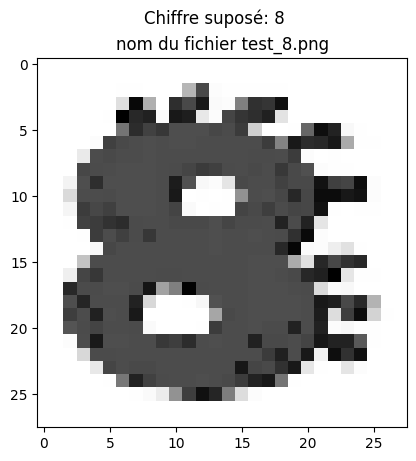

In [72]:
import cv2
import numpy as np

files_name = ['test_4.png', 'test_7.png', 'test_3.png','test_8.png']

for file_name in files_name:
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = np.invert(img)
    img = img / 255.0
    img = img.reshape(1, 28, 28)

    prediction = model.predict(img)
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.suptitle(f"Chiffre suposé: {prediction.argmax()}")
    plt.title("nom du fichier " + file_name)
    plt.show()
